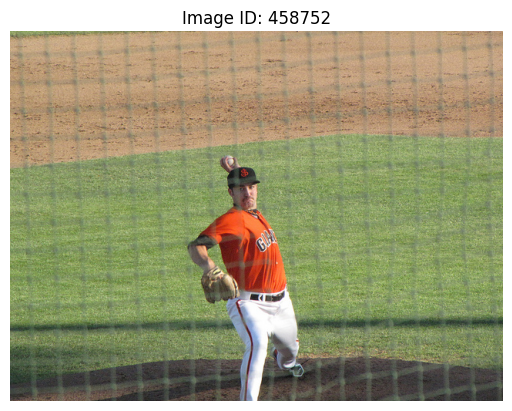

In [31]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def get_image_id_from_coco_filename(filename):
    """
    Extract the image_id from a COCO-style filename (e.g., 'COCO_test2015_000000564784.jpg').
    """
    # Remove the extension
    base_name = os.path.splitext(filename)[0]
    
    # Split the filename by underscores
    parts = base_name.split("_")
    
    # Extract the last part and convert to integer to remove leading zeros
    if len(parts) > 2:
        image_id = int(parts[-1])
        return image_id
    else:
        raise ValueError(f"Filename format is invalid: {filename}")

def find_image_with_id(image_id, folder):
    """
    Find the filename corresponding to the given image_id in the specified folder.
    """
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            if get_image_id_from_coco_filename(file) == image_id:
                return os.path.join(folder, file)
    return None

def display_image(image_id, folder):
    """
    Display the image with the specified image_id from the folder.
    """
    image_path = find_image_with_id(image_id, folder)
    if image_path:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.title(f"Image ID: {image_id}")
        plt.show()
    else:
        print(f"Image with ID {image_id} not found in folder '{folder}'.")

# Example usage
folder = "train"  # Replace with the folder containing your images
image_id = 458752  # The ID of the image to display
display_image(image_id, folder)


In [15]:
!pwd

/llm_vo_hoang_nhat_khang/workspace/tijepa/vqa_dataset


In [18]:
import json

file_name = "v2_mscoco_train2014_annotations.json"

with open(file_name) as f:
    data = json.load(f)

TypeError: unhashable type: 'slice'

In [19]:
data.keys()

dict_keys(['info', 'license', 'data_subtype', 'annotations', 'data_type'])

In [26]:
data['annotations'][0]

{'question_type': 'what is this',
 'multiple_choice_answer': 'net',
 'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 458752,
 'answer_type': 'other',
 'question_id': 458752000}

In [27]:
import json

file_name = "v2_OpenEnded_mscoco_train2014_questions.json"

with open(file_name) as f:
    data = json.load(f)

In [28]:
data.keys()

dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions'])

In [29]:
data['questions'][0]

{'image_id': 458752,
 'question': 'What is this photo taken looking through?',
 'question_id': 458752000}

In [33]:
import json

file_name = "combined_data_train.json"

with open(file_name) as f:
    TRAIN_DS = json.load(f)

In [34]:
TRAIN_DS[0]

{'questions': 'What is this photo taken looking through?',
 'question_type': 'what is this',
 'multiple_choice_answer': 'net',
 'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 458752,
 'answer_type': 'other',
 'question_id': 458752000}

In [43]:
with open("answer_mapping.json") as f:
    MP = json.load(f)

A3129 = set(MP.keys())
print(len(A3129))

3129


In [45]:
count = 0

for row in TRAIN_DS:
    ans = row['multiple_choice_answer']
    if ans in A3129:
        count += 1

print(len(TRAIN_DS))
print(count)


443757
411272


In [40]:
len(MP)

3129

In [57]:
ALL_IMAGES_TRAIN = os.listdir('train')
len(ALL_IMAGES_TRAIN)

82783

In [58]:
ALL_IMAGES_VAL = os.listdir('val')
len(ALL_IMAGES_VAL)

40504

In [59]:
ALL_IMAGES_TRAIN = [
    name[-16:] for name in ALL_IMAGES_TRAIN
]

In [60]:
ALL_IMAGES_VAL = [
    name[-16:] for name in ALL_IMAGES_VAL
]

In [61]:
print(ALL_IMAGES_TRAIN[0])
print(ALL_IMAGES_VAL[0])

000000322557.jpg
000000557130.jpg


In [62]:
len(set(ALL_IMAGES_TRAIN+ALL_IMAGES_VAL))

123287

In [67]:
NEW_COCO = set(ALL_IMAGES_TRAIN+ALL_IMAGES_VAL)

In [64]:
82783+40504

123287

In [65]:
MYCOCO = "../src/datasets/train"
ALL_MYCOCO = os.listdir(MYCOCO)
len(ALL_MYCOCO)

118287

In [68]:
count = 0
for my_co in ALL_MYCOCO:
    if my_co in NEW_COCO:
        count += 1
count

118287

In [73]:
FALSY = 0
for row in TRAIN_DS:
    answers = [answer['answer'] for answer in row['answers']]
    mca = row['multiple_choice_answer']
    if mca not in answers:
        FALSY += 1

FALSY

0

In [74]:
with open('combined_data_val.json') as f:
    VAL_DS = json.load(f)

In [75]:
FALSY = 0
for row in VAL_DS:
    answers = [answer['answer'] for answer in row['answers']]
    mca = row['multiple_choice_answer']
    if mca not in answers:
        FALSY += 1

FALSY

0

In [78]:
TRAIN_FOLDER = os.listdir("train")
print(len(TRAIN_FOLDER))
VAL_FOLDER = os.listdir("val")
print(len(VAL_FOLDER))
TENSOR_FOLDER = os.listdir("vqa_tensor_448")
print(len(TENSOR_FOLDER))


82783
40504
123287
